# Setup

Importing face_recognition, PIL and Matplotlib.

In [1]:
# Face Recognition - Python library that recognizes and manipulate faces on images
import face_recognition

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Python Imaging Library (PIL) - library that adds support for opening, manipulating, and saving image files.
from PIL import Image as PIL_Image
from PIL import ImageDraw as PIL_ImageDraw
from PIL import ImageFont as PIL_ImageFont

# from IPython.display import Image
# from IPython.core.display import display, HTML

# Display group image

We have an image with a group of people and we will try to find and recognize the faces on this iimage.

Let's display the image first to see how it looks.

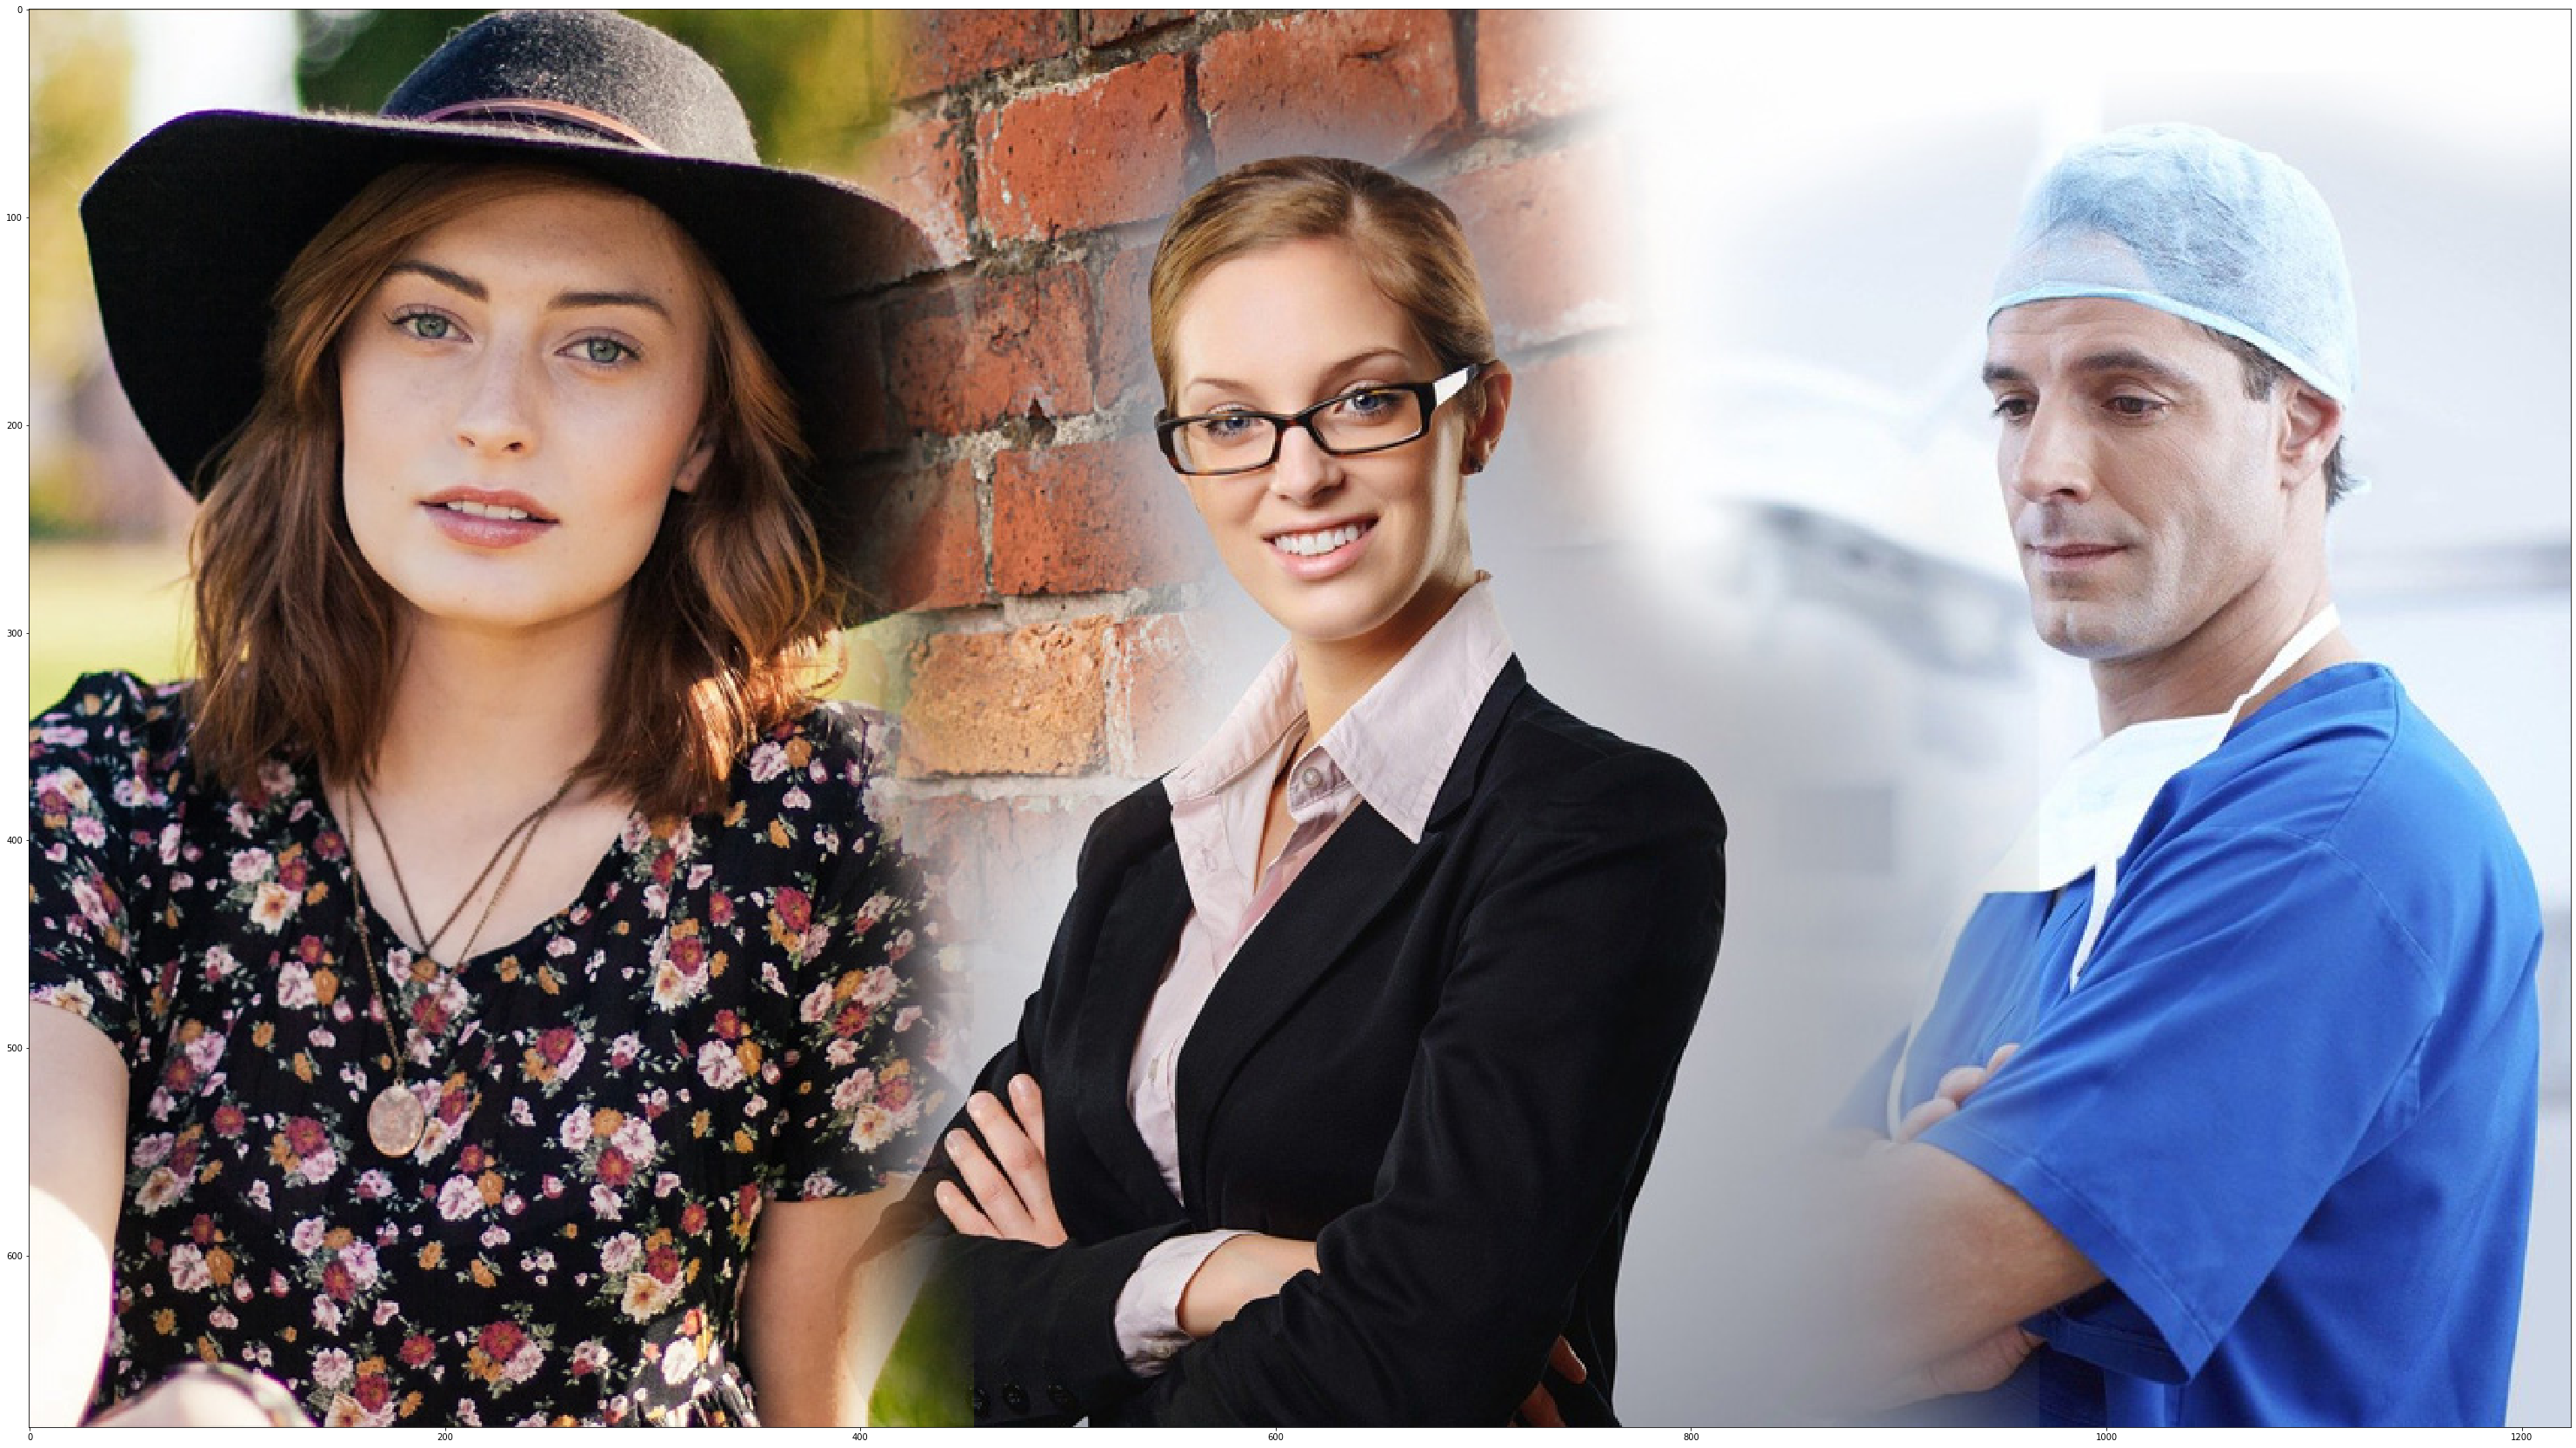

In [2]:
# configuring the size of our image
plt.figure(figsize=(80,30))

# defining the path to our image
image = './images/groups/team.jpg'

# displaying the image with matplotlib.pyplot
plt.imshow(mpimg.imread(image))
plt.show()

# Count the number of people

Let's try to perform our first simple face recognition task and let's try to count the faces on this image.

In [3]:
# loading the group image from above and creating the face_recognition library image object
group_image = face_recognition.load_image_file('./images/groups/team.jpg')

This will return a numpy matrix representation of the image. Let's look at the shape of this matrix.

In [4]:
print(group_image.shape)

(683, 1224, 3)


So the matrix is 683 x 1224 x 3. 683 and 1224 are the dimensions of the image and it equals the number of pixels of the image. and for each pixel it has 3 additional elements which represent the RGB colors of the image.

This is how images are represented in all Machine Learning projects because all Machine Learning operate on numbers in the matrix format similar to this.

Now let's try to localize the faces on this image using the face_recognition library. We will use face_locations function for that.

We will also create face_encodings of our group_image with all the unique faces of the faces from our group_image. We will use this list later in order to compare and find the faces from the group_image to the known faces we will try to find on this image.

In [5]:
face_locations = face_recognition.face_locations(group_image)
face_encodings = face_recognition.face_encodings(group_image, face_locations)
print(face_locations)

[(133, 1061, 288, 906), (118, 324, 304, 139), (150, 700, 305, 545)]


As a result we get a list of coordinates on the image of all the faces found in the image.

We will use these coordinates later but now, thanks to that, we can display the number of people found in this image.

In [6]:
number_of_faces = len(face_locations)
print('There are '+ str(number_of_faces) +' people in this image')

There are 3 people in this image


# Who are we looking for

Now, let's try to define and load the face that we will be looking for on the image.

In [7]:
# creating a variable with our known face image location path
known_image = './images/known/kate.jpg'

# here we are loading the known face image using the face_recognition library
known_face_image = face_recognition.load_image_file(known_image)

Now we are using the face_encodings function of the face_recognition library to create a matrix of unique features of the known face that we can use to compare and find this face on another images

In [8]:
known_face_image_encoding = face_recognition.face_encodings(known_face_image)[0]

Let's also display this know face image to see how it looks

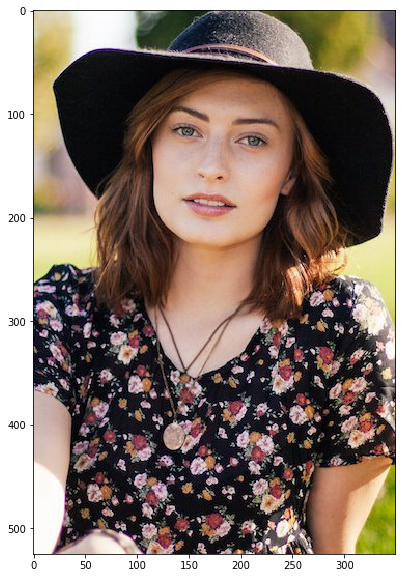

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread(known_image))
plt.show()

# Cut out faces

Before we get to finding our known face on the group image let's cut out the faces from the group image and siplay them as separate images.

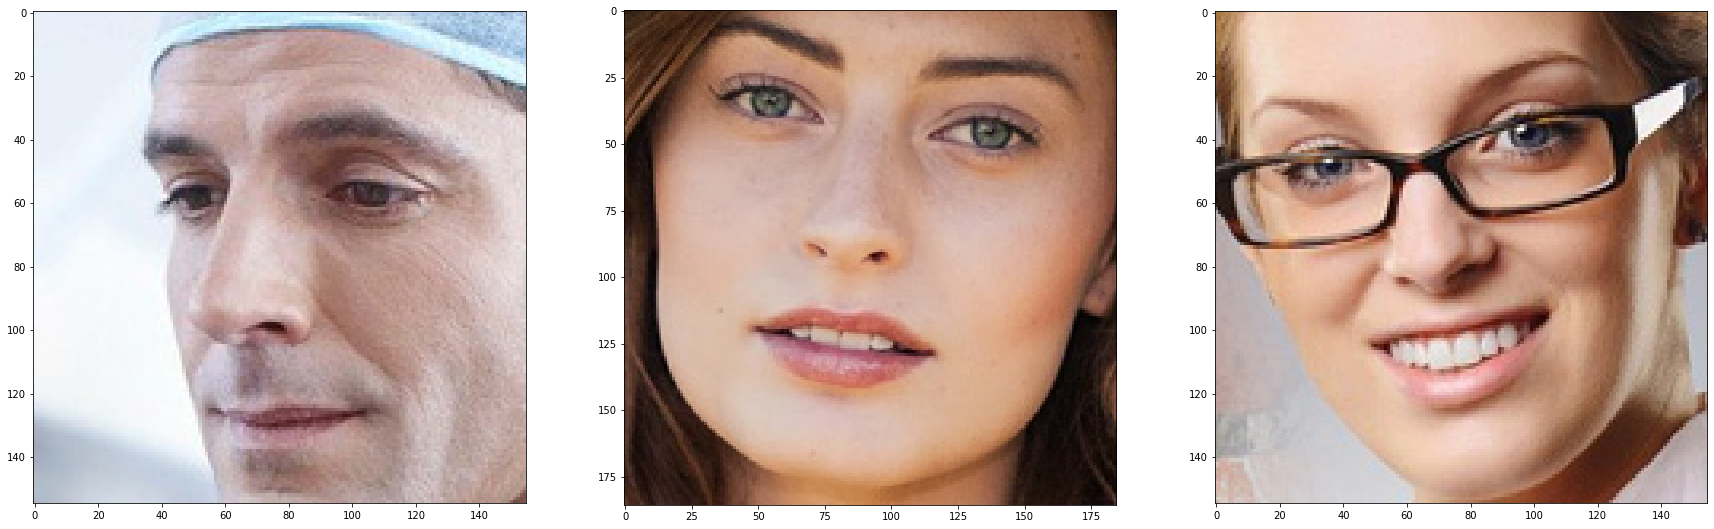

In [10]:
# defining an empty array for the face images from the group image.
faces = []

# we are going to loop through the face_locations list
# and we are going to cut of the faces from the group image
# based on the coordinates from the face_locations list
for face_location in face_locations:
    # take the coordinates
    top, right, bottom, left = face_location
    # cut of the matrix of each face from the group_image matric
    face_image = group_image[top:bottom, left:right]
    # add to our faces array
    faces.append(face_image)

# defining the size of our plot
plt.figure(figsize=(30,30))

# defining the maximum number of columns in our subplot where we will be displaying our faces
columns = 3

# looping through each face from the faces array and display each face as an image
for i, face in enumerate(faces):
    plt.subplot(number_of_faces / columns + 1, columns, i + 1)
    plt.imshow(face)

plt.show()

# Find and mark known faces

Now we will try to find our known face on the group image and create an outline with the name of the person on the group image.

We will also create an outline on the group image of the unknown faces.

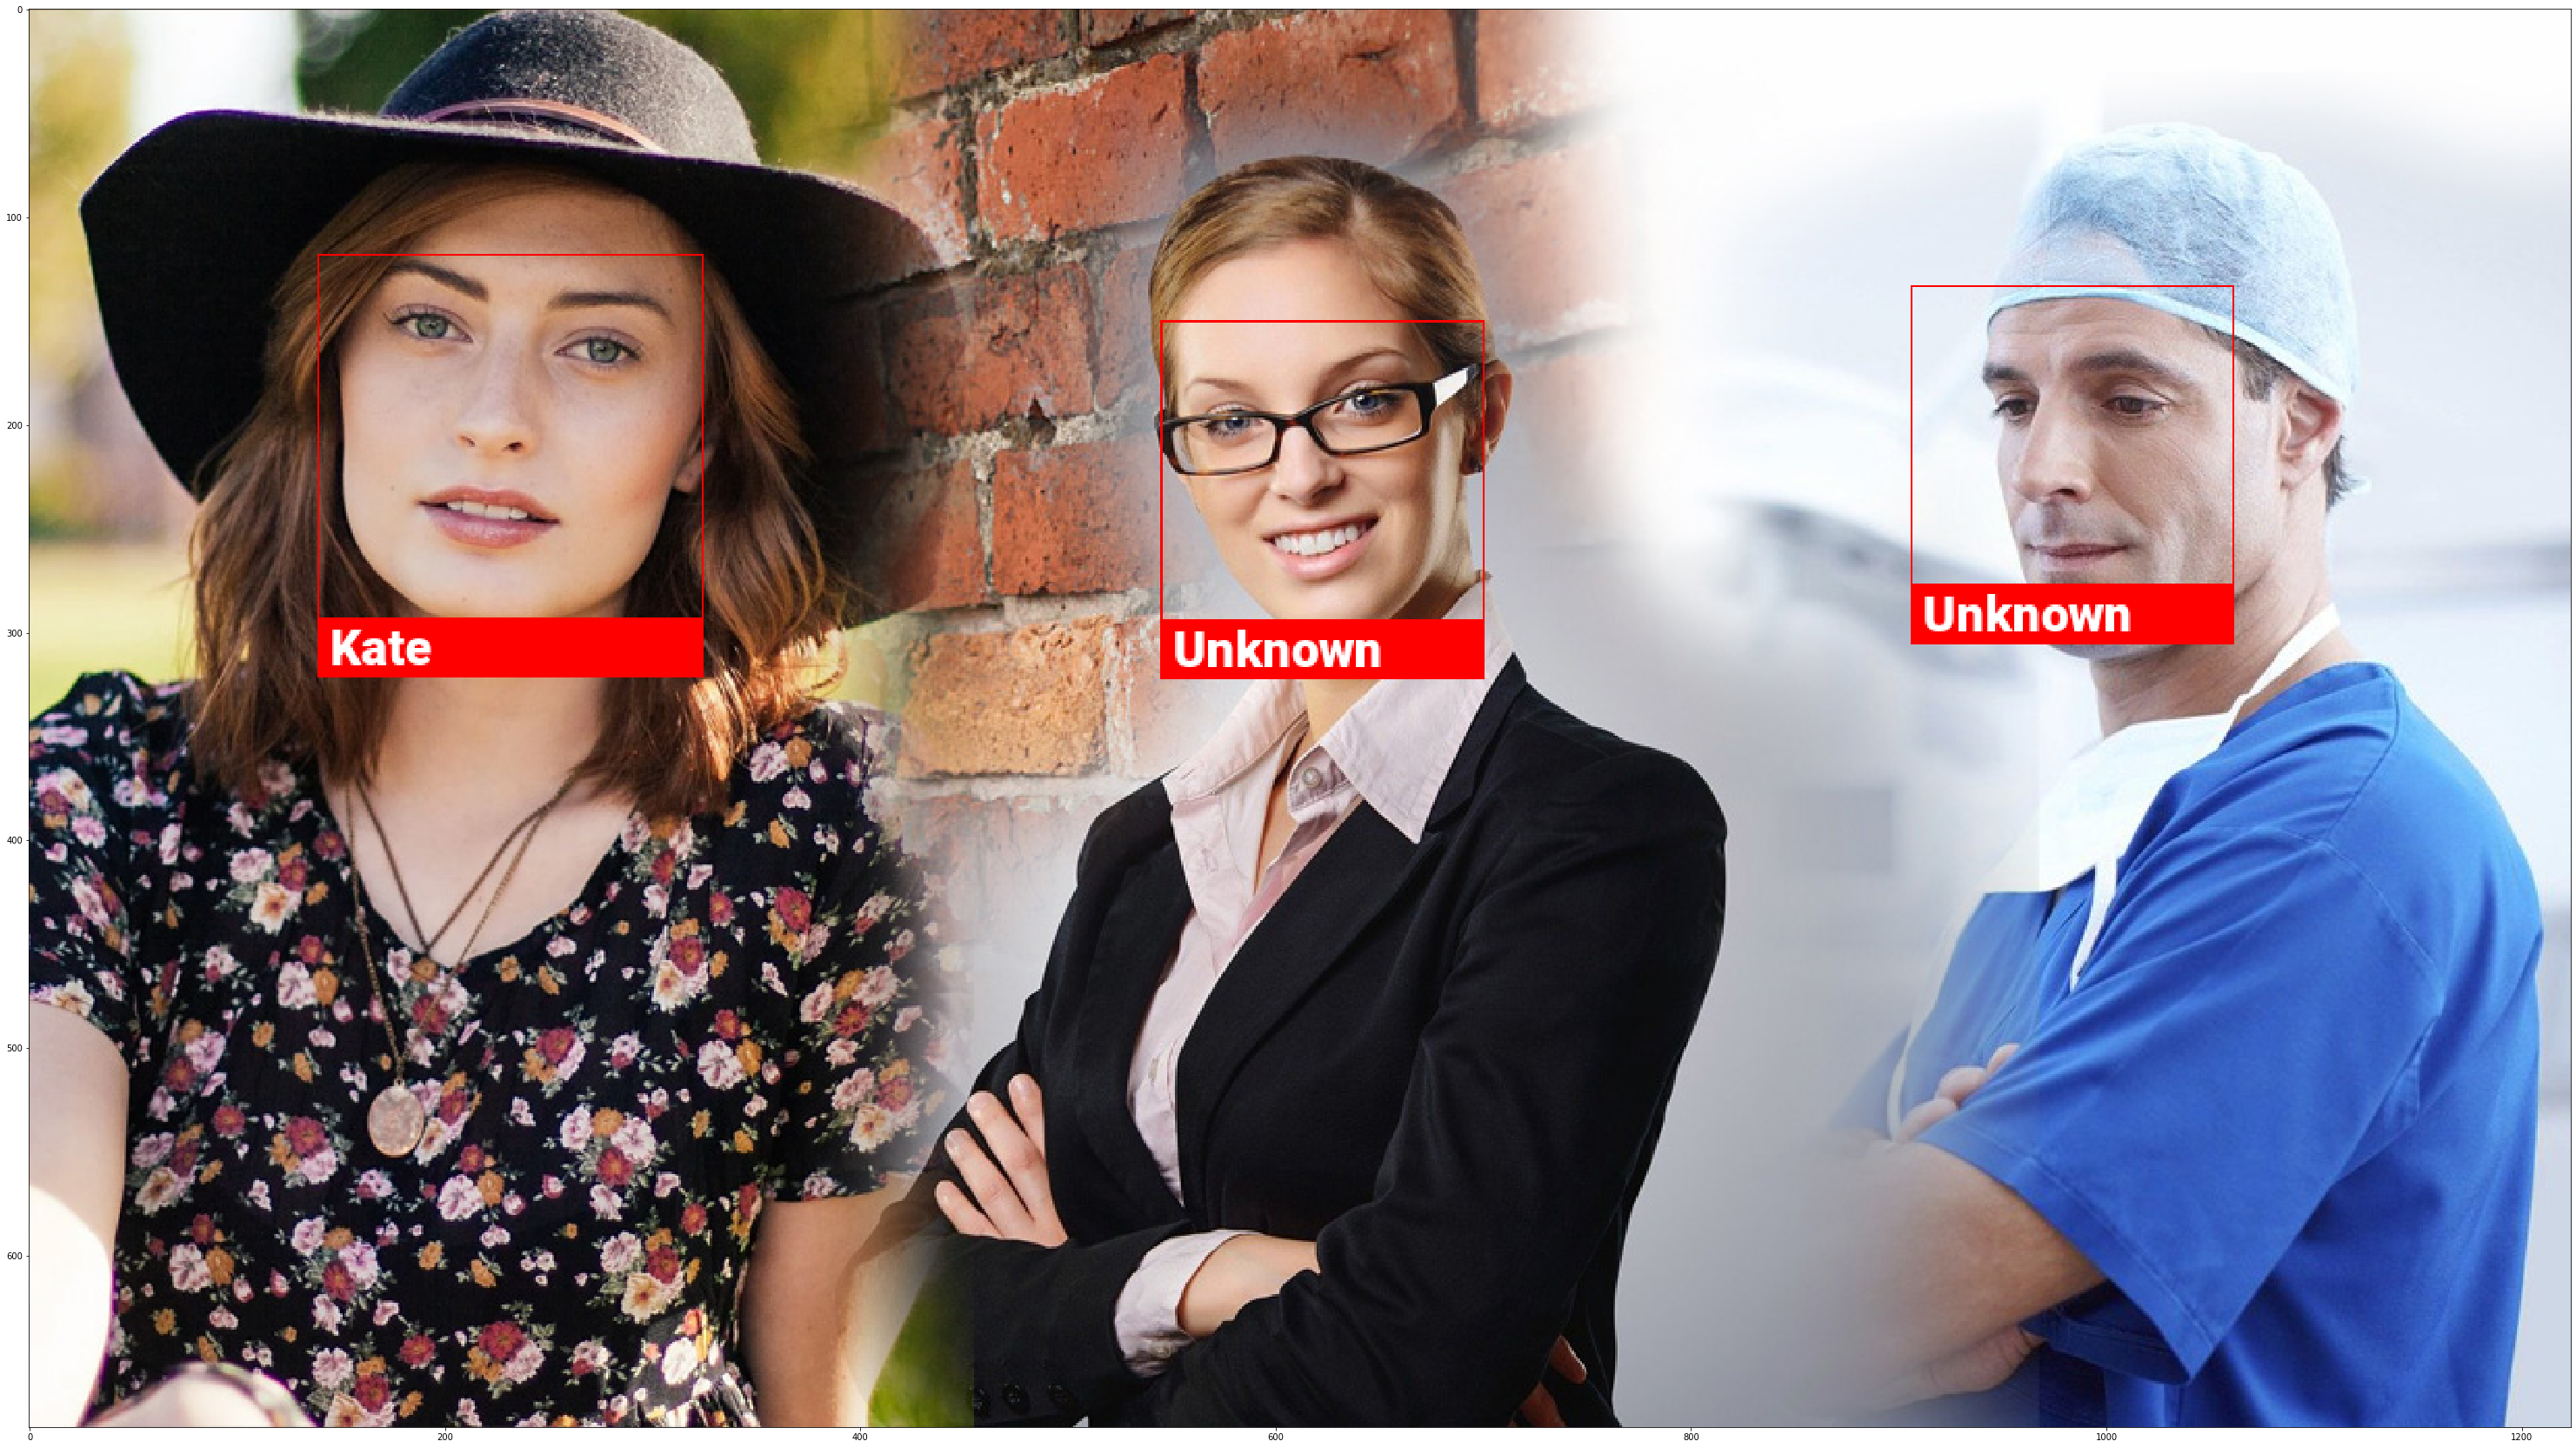

In [11]:
# This is an array of known_faces_encodings. In our example it is just one face
# but you can experiment with other examples and more known faces
known_faces_encodings = [known_face_image_encoding]

# In known_faces_labels array we will define corresponding name labels of our known faces
known_faces_labels = ['Kate']

pil_group_image = PIL_Image.fromarray(group_image)

# now we are creating a draw object that will enable us to annotate on existing group image
pil_group_image_draw = PIL_ImageDraw.Draw(pil_group_image)

# we will look through each face_locations and corresponding face_encodings
# to check if any of the faces on the group image matches any of the faces on known_faces_encodings
for (top, right, bottom, left), face_encoding in zip (face_locations, face_encodings):

    matches = face_recognition.compare_faces(known_faces_encodings, face_encoding)

    if True in matches:
        match_index = matches.index(True)
        name = known_faces_labels[match_index]
    else:
        name = "Unknown"
        
    # drawing rectangle around the face
    pil_group_image_draw.rectangle(((left, top), (right, bottom)), outline=(255,0,0))

    # checking the width and the height of the name
    text_width, text_height = pil_group_image_draw.textsize(name)
    
    # drawing a filled with colour rectangle to display the name on
    pil_group_image_draw.rectangle(((left, bottom - text_height), (right, bottom+17)), fill=(255,0,0), outline=(255,0,0))
    
    # defining the font for a name
    fnt = PIL_ImageFont.truetype("Roboto-Black.ttf", 24)
    
    # and displaying a text with the name
    pil_group_image_draw.text((left + 6, bottom - text_height), name, font=fnt, fill=(255,255,255,255))

# deleting the pil_group_image_draw to free up the memory
del pil_group_image_draw

# defining the size of the image
plt.figure(figsize=(80,30))

# displaying the group image with annotations
plt.imshow(pil_group_image)

This is a simple example of the face regocnition application that shoould teach you how to use the liberary.

Face recognition is important, useful and widely used technique and we encourage you to practice more with other images that you have in your own image library oor found on the internet.